In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Example on Synthetic Network</h1>

<h2>Dependencies</h2>

In [2]:
%reload_ext autoreload
%autoreload 2

from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from utils import viz
from utils import io

<h2>Parameters</h2>

In [3]:
kind = "BAH"         # network generative model type
N = 2000             # number of nodes
m = 4                # minimun degree (proxy of density)
H = 0.6              # homophily
B = 0.5              # class balance (minority fraction)
sampling = "nodes"   # subgraph sampling method
pseeds = 0.05        # fraction of nodes to sample 
LC = "prior"         # local model
RC = "nBC"           # relational model
CI = "relaxation"    # inference

<h2>1. Network</h2>

In [4]:
net = Network(kind)
net.create_network(N=N,m=m,B=B,H=H)
net.info()

Name: BAH
Type: Graph
Number of nodes: 2000
Number of edges: 7984
Average degree:   7.9840
{'labels': ['blue', 'red'], 'name': 'BAH', 'group': ['M', 'm'], 'attributes': ['color'], 'class': 'color'}


<h2>2. Sampling</h2>

In [5]:
sam = Sampling(sampling, net.G, pseeds)
sam.extract_subgraph()
sam.info()

Name: BAH
Type: Graph
Number of nodes: 100
Number of edges: 23
Average degree:   0.4600
{'labels': ['blue', 'red'], 'class': 'color', 'pseeds': 0.05, 'name': 'BAH', 'method': 'nodes', 'group': ['M', 'm'], 'attributes': ['color']}


<h2>3. Modeling</h2>

In [6]:
local_model = Local(LC)
local_model.learn(sam.Gseeds)
local_model.info()

blue    0.52
red     0.48
dtype: float64


In [7]:
relational_model = Relational(RC).get_model()
relational_model.learn(sam.Gseeds)
relational_model.info()

          blue       red
blue  0.714286  0.285714
red   0.666667  0.333333


<h2>4. Inference</h2>

In [16]:
inference = Inference(CI)
inference.predict(net.G, local_model, relational_model)
inference.evaluation()
inference.summary()

(1, 0, 1, 1, 1)
(1, 1, 1, 1, 1)
(0.9965160086603163, 0.9957508083356381, 0.9905659140130034, 0.9576600755363471, 0.9998012809420698)
Prediction in 898.3297712802887 seconds
ROCAUC: 0.5129806669503245
ROCAUC curve: 0.5129806669503245
MAE: 0.51
ccm: 0.6323529411764706
ccM: 0.3470464135021097
bias: 0.6456538266599088


<h2>5. Results</h2>

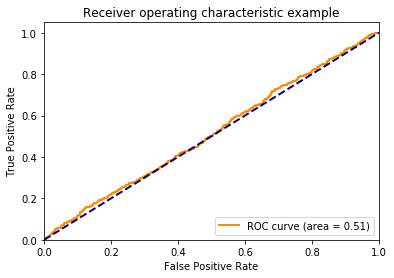

In [17]:
fn = None
viz.plot_rocauc_curve(inference.fpr, inference.tpr, inference.rocauc_curve, fn)